In [238]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
# import lightgbm as lgb
# import xgboost as xgb
# import pandas_profiling as ppf
import warnings##忽略警告
import pandas as pd
import numpy as np
import gc#垃圾回收机制
import time
import pickle#数据保存为一个pkl格式
import seaborn as sns
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt
# from xgboost import XGBRegressor
from sklearn import preprocessing 
# from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
# from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [239]:
dt1_1 = pd.read_excel('data/附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name='企业信息')
dt1_2 = pd.read_excel('data/附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name='进项发票信息')
dt1_3 = pd.read_excel('data/附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name='销项发票信息')

dt2_1 = pd.read_excel('data/附件2：302家无信贷记录企业的相关数据.xlsx',sheet_name='企业信息')
dt2_2 = pd.read_excel('data/附件2：302家无信贷记录企业的相关数据.xlsx',sheet_name='进项发票信息')
dt2_3 = pd.read_excel('data/附件2：302家无信贷记录企业的相关数据.xlsx',sheet_name='销项发票信息')

dt3 = pd.read_excel('data/附件3：银行贷款年利率与客户流失率关系的统计数据.xlsx')

In [240]:
def trans_xypj(s):
    if s=='A':
        return 1
    elif s=='B':
        return 2
    elif s=='C':
        return 3
    elif s=='D':
        return 4
def trans_sfwy(s):
    if s=='是':
        return 1
    elif s=='否':
        return 0
dt1_1['信誉评级_num'] = dt1_1['信誉评级'].apply(trans_xypj)
dt1_1['是否违约_num'] = dt1_1['是否违约'].apply(trans_sfwy)

Text(0.5, 1.0, 'Distribution of Credit Rating')

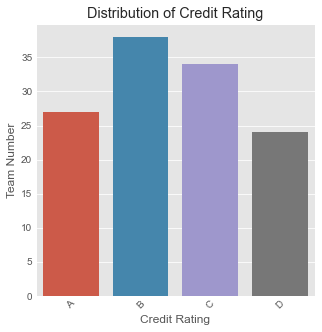

In [253]:
# visualization
dt1_1_group_xypj = dt1_1.groupby('信誉评级')['是否违约'].agg('count').reset_index() 
plt.figure(figsize=(5,5))
sns.barplot(x=dt1_1_group_xypj['信誉评级'], y=dt1_1_group_xypj['是否违约'])
plt.xticks(rotation= 45)
plt.xlabel('Credit Rating')
plt.ylabel('Team Number')
plt.title('Distribution of Credit Rating')

In [249]:
dt1_1_group_xypj

,信誉评级,是否违约
0,A,27
1,B,38
2,C,34
3,D,24


Text(0.5, 1.0, 'Whether Breach of contract')

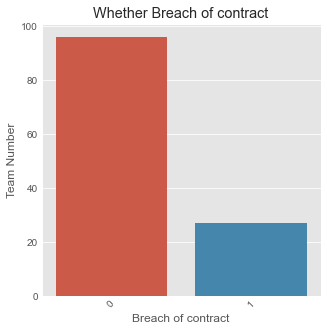

In [242]:
# visualization
dt1_1_group_sfwy = dt1_1.groupby('是否违约_num')['信誉评级'].agg('count').reset_index() 
plt.figure(figsize=(5,5))
sns.barplot(x=dt1_1_group_sfwy['是否违约_num'], y=dt1_1_group_sfwy['信誉评级'])
plt.xticks(rotation= 45)
plt.xlabel('Breach of contract')
plt.ylabel('Team Number')
plt.title('Whether Breach of contract')

###0表示不违约，1表示违约

In [250]:
dt1_1_group_sfwy

,是否违约_num,信誉评级
0,0,96
1,1,27


In [251]:
27/123

0.21951219512195122

In [243]:

# visualization
dt1_2.groupby('发票状态')['税额'].agg('count').reset_index()


,发票状态,税额
0,作废发票,7608
1,有效发票,203339


In [244]:
dt1_2 = dt1_2[dt1_2['发票状态']=='有效发票']
dt1_2['month']=dt1_2['开票日期'].apply(lambda x:np.int(str(x).split('-')[1]))
dt1_2['year']=dt1_2['开票日期'].apply(lambda x:np.int(str(x).split('-')[0]))

In [245]:
dt1_3 = dt1_3[dt1_3['发票状态']=='有效发票']
dt1_3['month']=dt1_3['开票日期'].apply(lambda x:np.int(str(x).split('-')[1]))
dt1_3['year']=dt1_3['开票日期'].apply(lambda x:np.int(str(x).split('-')[0]))

In [246]:
dt1_2

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态,month,year
0,E1,3390939,2017-07-18,A00297,-943.40,-56.60,-1000.00,有效发票,7,2017
1,E1,3390940,2017-07-18,A00297,-4780.24,-286.81,-5067.05,有效发票,7,2017
2,E1,3390941,2017-07-18,A00297,943.40,56.60,1000.00,有效发票,7,2017
3,E1,3390942,2017-07-18,A00297,4780.24,286.81,5067.05,有效发票,7,2017
4,E1,9902669,2017-08-07,A05061,326.21,9.79,336.00,有效发票,8,2017
...,...,...,...,...,...,...,...,...,...,...
210942,E122,54706234,2019-04-17,A08967,223.30,6.70,230.00,有效发票,4,2019
210943,E122,55721344,2020-01-10,A09184,264.15,15.85,280.00,有效发票,1,2020
210944,E123,38493295,2017-12-15,A03624,264.15,15.85,280.00,有效发票,12,2017
210945,E123,95472001,2018-12-29,A03626,264.15,15.85,280.00,有效发票,12,2018


In [247]:
dt1_2_jiashuizonge = dt1_2.groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt1_2_jiashuizonge.rename(columns={'价税合计':'进项发票_价税总额'},inplace=True)

dt1_2_dadanjiaoyie = dt1_2[np.abs(dt1_2['价税合计'])>100000].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt1_2_dadanjiaoyie.rename(columns={'价税合计':'进项发票_大单交易额'},inplace=True)

dt1_2_tuikuanzonge = dt1_2[(dt1_2['价税合计'])<0].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt1_2_tuikuanzonge.rename(columns={'价税合计':'进项发票_退款总额'},inplace=True)

dt1_2_tuikuandadanjiaoyie = dt1_2[(dt1_2['价税合计']<-100000)].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt1_2_tuikuandadanjiaoyie.rename(columns={'价税合计':'进项发票_退款大单交易额'},inplace=True)

dt1_2_xiaofangdanweidaihaoshuliang = dt1_2.groupby(['企业代号','year','month'])['销方单位代号'].agg('unique').reset_index()
dt1_2_xiaofangdanweidaihaoshuliang['销方单位代号'] = dt1_2_xiaofangdanweidaihaoshuliang['销方单位代号'].apply(lambda x:len(x))
dt1_2_xiaofangdanweidaihaoshuliang.rename(columns={'销方单位代号':'进项发票_销方单位代号数量'},inplace=True)

dt1_2_res = pd.merge(dt1_2_jiashuizonge,dt1_2_dadanjiaoyie,on=['企业代号','year','month'],how='outer')
dt1_2_res = pd.merge(dt1_2_res,dt1_2_tuikuanzonge,on=['企业代号','year','month'],how='outer')
dt1_2_res = pd.merge(dt1_2_res,dt1_2_tuikuandadanjiaoyie,on=['企业代号','year','month'],how='outer')
dt1_2_res = pd.merge(dt1_2_res,dt1_2_xiaofangdanweidaihaoshuliang,on=['企业代号','year','month'],how='outer')

dt1_2_res.fillna(0,inplace=True)

dt1_2_res = pd.merge(dt1_2_res,dt1_1,on='企业代号',how='outer')

In [248]:
dt1_2_res

,企业代号,year,month,进项发票_价税总额,进项发票_大单交易额,进项发票_退款总额,进项发票_退款大单交易额,进项发票_销方单位代号数量,企业名称,信誉评级,是否违约,信誉评级_num,是否违约_num
0,E1,2017,7,0.000000e+00,0.0,-6067.05,0.0,1,***电器销售有限公司,A,否,1,0
1,E1,2017,8,2.788474e+08,278754736.0,-60000000.00,-60000000.0,17,***电器销售有限公司,A,否,1,0
2,E1,2017,9,2.967772e+08,296263441.0,-60000000.00,-60000000.0,39,***电器销售有限公司,A,否,1,0
3,E1,2017,10,1.994723e+08,199237681.0,-50000000.00,-50000000.0,27,***电器销售有限公司,A,否,1,0
4,E1,2017,11,3.020335e+08,301785212.0,-70000000.00,-70000000.0,33,***电器销售有限公司,A,否,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,E99,2019,7,1.657332e+04,0.0,0.00,0.0,5,***建筑工程有限责任公司,D,是,4,1
3390,E99,2019,8,2.639542e+04,0.0,0.00,0.0,4,***建筑工程有限责任公司,D,是,4,1
3391,E99,2019,9,1.306870e+05,101200.0,0.00,0.0,4,***建筑工程有限责任公司,D,是,4,1
3392,E99,2019,10,3.521362e+04,0.0,-101200.00,-101200.0,10,***建筑工程有限责任公司,D,是,4,1


In [217]:
dt1_2_res.to_csv('进项发票处理后数据.csv')

In [223]:
dt1_3_jiashuizonge = dt1_3.groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt1_3_jiashuizonge.rename(columns={'价税合计':'销项发票_价税总额'},inplace=True)

dt1_3_dadanjiaoyie = dt1_3[np.abs(dt1_3['价税合计'])>100000].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt1_3_dadanjiaoyie.rename(columns={'价税合计':'销项发票_大单交易额'},inplace=True)

dt1_3_tuikuanzonge = dt1_3[(dt1_3['价税合计'])<0].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt1_3_tuikuanzonge.rename(columns={'价税合计':'销项发票_退款总额'},inplace=True)

dt1_3_tuikuandadanjiaoyie = dt1_3[(dt1_3['价税合计']<-100000)].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt1_3_tuikuandadanjiaoyie.rename(columns={'价税合计':'销项发票_退款大单交易额'},inplace=True)

dt1_3_xiaofangdanweidaihaoshuliang = dt1_3.groupby(['企业代号','year','month'])['购方单位代号'].agg('unique').reset_index()
dt1_3_xiaofangdanweidaihaoshuliang['购方单位代号'] = dt1_3_xiaofangdanweidaihaoshuliang['购方单位代号'].apply(lambda x:len(x))
dt1_3_xiaofangdanweidaihaoshuliang.rename(columns={'购方单位代号':'销项发票_购方单位代号数量'},inplace=True)

dt1_3_res = pd.merge(dt1_3_jiashuizonge,dt1_3_dadanjiaoyie,on=['企业代号','year','month'],how='outer')
dt1_3_res = pd.merge(dt1_3_res,dt1_3_tuikuanzonge,on=['企业代号','year','month'],how='outer')
dt1_3_res = pd.merge(dt1_3_res,dt1_3_tuikuandadanjiaoyie,on=['企业代号','year','month'],how='outer')
dt1_3_res = pd.merge(dt1_3_res,dt1_3_xiaofangdanweidaihaoshuliang,on=['企业代号','year','month'],how='outer')

dt1_3_res.fillna(0,inplace=True)

dt1_3_res = pd.merge(dt1_3_res,dt1_1,on='企业代号',how='outer')


In [224]:
dt1_3_res.to_csv('销项发票处理后数据.csv')

In [227]:
dt2_2

,企业代号,发票号码,开票日期,销方单位代号,金额,税额,价税合计,发票状态,month,year
0,E124,18891676,2017-09-01 00:00:00,C00014,338.46,57.54,396.0,有效发票,9,2017
1,E124,18691267,2017-09-01 00:00:00,C00480,230.10,6.90,237.0,有效发票,9,2017
2,E124,12995412,2017-09-01 00:00:00,C23675,223.30,6.70,230.0,有效发票,9,2017
3,E124,6378193,2017-09-01 11:11:03,C00333,90090.09,9909.91,100000.0,有效发票,9,2017
4,E124,6378194,2017-09-01 11:12:01,C00333,90090.09,9909.91,100000.0,有效发票,9,2017
...,...,...,...,...,...,...,...,...,...,...
395170,E425,72101375,2019-12-30 00:00:00,C23112,663.11,19.89,683.0,有效发票,12,2019
395171,E425,20253285,2020-01-05 00:00:00,C01937,45.41,4.09,49.5,有效发票,1,2020
395172,E425,20253315,2020-01-05 00:00:00,C01937,110.14,1.16,111.3,有效发票,1,2020
395173,E425,52449404,2020-01-06 00:00:00,C15032,73.22,6.58,79.8,有效发票,1,2020


# 附件二

In [228]:
dt2_2 = dt2_2[dt2_2['发票状态']=='有效发票']
dt2_2['month']=dt2_2['开票日期'].apply(lambda x:np.int(str(x).split('-')[1]))
dt2_2['year']=dt2_2['开票日期'].apply(lambda x:np.int(str(x).split('-')[0]))

dt2_2_jiashuizonge = dt2_2.groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt2_2_jiashuizonge.rename(columns={'价税合计':'进项发票_价税总额'},inplace=True)

dt2_2_dadanjiaoyie = dt2_2[np.abs(dt2_2['价税合计'])>100000].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt2_2_dadanjiaoyie.rename(columns={'价税合计':'进项发票_大单交易额'},inplace=True)

dt2_2_tuikuanzonge = dt2_2[(dt2_2['价税合计'])<0].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt2_2_tuikuanzonge.rename(columns={'价税合计':'进项发票_退款总额'},inplace=True)

dt2_2_tuikuandadanjiaoyie = dt2_2[(dt2_2['价税合计']<-100000)].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt2_2_tuikuandadanjiaoyie.rename(columns={'价税合计':'进项发票_退款大单交易额'},inplace=True)

dt2_2_xiaofangdanweidaihaoshuliang = dt2_2.groupby(['企业代号','year','month'])['销方单位代号'].agg('unique').reset_index()
dt2_2_xiaofangdanweidaihaoshuliang['销方单位代号'] = dt2_2_xiaofangdanweidaihaoshuliang['销方单位代号'].apply(lambda x:len(x))
dt2_2_xiaofangdanweidaihaoshuliang.rename(columns={'销方单位代号':'进项发票_销方单位代号数量'},inplace=True)

dt2_2_res = pd.merge(dt2_2_jiashuizonge,dt2_2_dadanjiaoyie,on=['企业代号','year','month'],how='outer')
dt2_2_res = pd.merge(dt2_2_res,dt2_2_tuikuanzonge,on=['企业代号','year','month'],how='outer')
dt2_2_res = pd.merge(dt2_2_res,dt2_2_tuikuandadanjiaoyie,on=['企业代号','year','month'],how='outer')
dt2_2_res = pd.merge(dt2_2_res,dt2_2_xiaofangdanweidaihaoshuliang,on=['企业代号','year','month'],how='outer')

dt2_2_res.fillna(0,inplace=True)

dt2_2_res.to_csv('附件二_进项发票处理后数据.csv')


In [229]:
dt2_3 = dt2_3[dt2_3['发票状态']=='有效发票']
dt2_3['month']=dt2_3['开票日期'].apply(lambda x:np.int(str(x).split('-')[1]))
dt2_3['year']=dt2_3['开票日期'].apply(lambda x:np.int(str(x).split('-')[0]))

dt2_3_jiashuizonge = dt2_3.groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt2_3_jiashuizonge.rename(columns={'价税合计':'销项发票_价税总额'},inplace=True)

dt2_3_dadanjiaoyie = dt2_3[np.abs(dt2_3['价税合计'])>100000].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt2_3_dadanjiaoyie.rename(columns={'价税合计':'销项发票_大单交易额'},inplace=True)

dt2_3_tuikuanzonge = dt2_3[(dt2_3['价税合计'])<0].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt2_3_tuikuanzonge.rename(columns={'价税合计':'销项发票_退款总额'},inplace=True)

dt2_3_tuikuandadanjiaoyie = dt2_3[(dt2_3['价税合计']<-100000)].groupby(['企业代号','year','month'])['价税合计'].agg('sum').reset_index()
dt2_3_tuikuandadanjiaoyie.rename(columns={'价税合计':'销项发票_退款大单交易额'},inplace=True)

dt2_3_xiaofangdanweidaihaoshuliang = dt2_3.groupby(['企业代号','year','month'])['购方单位代号'].agg('unique').reset_index()
dt2_3_xiaofangdanweidaihaoshuliang['购方单位代号'] = dt2_3_xiaofangdanweidaihaoshuliang['购方单位代号'].apply(lambda x:len(x))
dt2_3_xiaofangdanweidaihaoshuliang.rename(columns={'购方单位代号':'销项发票_购方单位代号数量'},inplace=True)

dt2_3_res = pd.merge(dt2_3_jiashuizonge,dt2_3_dadanjiaoyie,on=['企业代号','year','month'],how='outer')
dt2_3_res = pd.merge(dt2_3_res,dt2_3_tuikuanzonge,on=['企业代号','year','month'],how='outer')
dt2_3_res = pd.merge(dt2_3_res,dt2_3_tuikuandadanjiaoyie,on=['企业代号','year','month'],how='outer')
dt2_3_res = pd.merge(dt2_3_res,dt2_3_xiaofangdanweidaihaoshuliang,on=['企业代号','year','month'],how='outer')

dt2_3_res.fillna(0,inplace=True)

dt2_3_res.to_csv('附件二_销项发票处理后数据.csv')


# dh

In [81]:
dt1_1

,企业代号,企业名称,信誉评级,是否违约
0,E1,***电器销售有限公司,A,否
1,E2,***技术有限责任公司,A,否
2,E3,***电子(中国)有限公司***分公司,C,否
3,E4,***发展有限责任公司,C,否
4,E5,***供应链管理有限公司,B,否
...,...,...,...,...
118,E119,***药房,D,是
119,E120,***陈列广告有限公司,D,是
120,E121,***药业连锁有限公司***药店,D,是
121,E122,***商贸有限责任公司,D,是


In [103]:
data_x

,month,价税合计
0,1,5.285379e+08
1,2,3.776869e+08
2,3,8.066585e+08
3,4,5.342025e+08
4,5,5.064226e+08
5,6,8.389831e+08
6,7,5.150061e+08
7,8,6.648189e+08
8,9,8.191287e+08
9,10,8.619721e+08


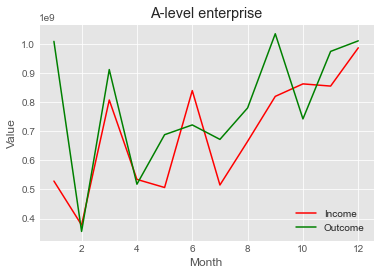

In [108]:
data_dh_x = pd.merge(dt1_1,dt1_2,on='企业代号',how='outer')
data_x = data_dh_x[(data_dh_x['信誉评级']=='A')][['价税合计','month']]
data_x = data_x.groupby('month')['价税合计'].agg('sum').reset_index()

dt1_3['month'] = dt1_3['开票日期'].apply(lambda x:np.int(str(x).split('-')[1]))
data_dh_y = pd.merge(dt1_1,dt1_3,on='企业代号',how='outer')
data_y = data_dh_y[(data_dh_y['信誉评级']=='A')][['价税合计','month']]
data_y = data_y.groupby('month')['价税合计'].agg('sum').reset_index()


plot1=plt.plot(data_x['month'], data_x['价税合计'], 'r',label='Income')
plot2=plt.plot(data_y['month'], data_y['价税合计'], 'g',label='Outcome')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(loc=4)
plt.title('A-level enterprise')
plt.show()


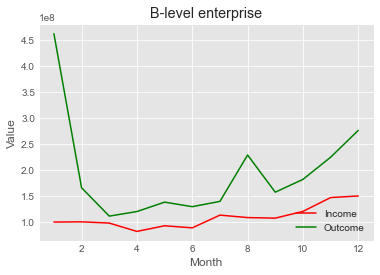

In [109]:
data_dh_x = pd.merge(dt1_1,dt1_2,on='企业代号',how='outer')
data_x = data_dh_x[(data_dh_x['信誉评级']=='B')][['价税合计','month']]
data_x = data_x.groupby('month')['价税合计'].agg('sum').reset_index()

dt1_3['month'] = dt1_3['开票日期'].apply(lambda x:np.int(str(x).split('-')[1]))
data_dh_y = pd.merge(dt1_1,dt1_3,on='企业代号',how='outer')
data_y = data_dh_y[(data_dh_y['信誉评级']=='B')][['价税合计','month']]
data_y = data_y.groupby('month')['价税合计'].agg('sum').reset_index()


plot1=plt.plot(data_x['month'], data_x['价税合计'], 'r',label='Income')
plot2=plt.plot(data_y['month'], data_y['价税合计'], 'g',label='Outcome')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(loc=4)
plt.title('B-level enterprise')
plt.show()


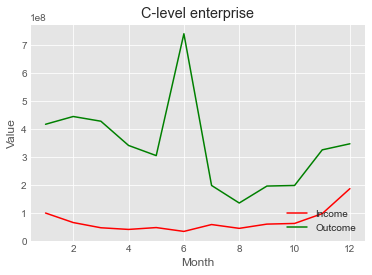

In [110]:
data_dh_x = pd.merge(dt1_1,dt1_2,on='企业代号',how='outer')
data_x = data_dh_x[(data_dh_x['信誉评级']=='C')][['价税合计','month']]
data_x = data_x.groupby('month')['价税合计'].agg('sum').reset_index()

dt1_3['month'] = dt1_3['开票日期'].apply(lambda x:np.int(str(x).split('-')[1]))
data_dh_y = pd.merge(dt1_1,dt1_3,on='企业代号',how='outer')
data_y = data_dh_y[(data_dh_y['信誉评级']=='C')][['价税合计','month']]
data_y = data_y.groupby('month')['价税合计'].agg('sum').reset_index()


plot1=plt.plot(data_x['month'], data_x['价税合计'], 'r',label='Income')
plot2=plt.plot(data_y['month'], data_y['价税合计'], 'g',label='Outcome')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(loc=4)
plt.title('C-level enterprise')
plt.show()


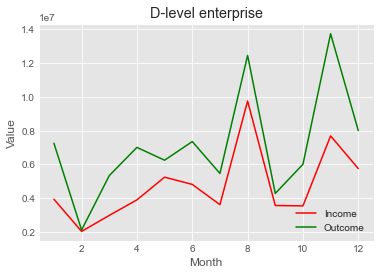

In [111]:
data_dh_x = pd.merge(dt1_1,dt1_2,on='企业代号',how='outer')
data_x = data_dh_x[(data_dh_x['信誉评级']=='D')][['价税合计','month']]
data_x = data_x.groupby('month')['价税合计'].agg('sum').reset_index()

dt1_3['month'] = dt1_3['开票日期'].apply(lambda x:np.int(str(x).split('-')[1]))
data_dh_y = pd.merge(dt1_1,dt1_3,on='企业代号',how='outer')
data_y = data_dh_y[(data_dh_y['信誉评级']=='D')][['价税合计','month']]
data_y = data_y.groupby('month')['价税合计'].agg('sum').reset_index()


plot1=plt.plot(data_x['month'], data_x['价税合计'], 'r',label='Income')
plot2=plt.plot(data_y['month'], data_y['价税合计'], 'g',label='Outcome')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(loc=4)
plt.title('D-level enterprise')
plt.show()


# dh3

In [155]:
data_dh = pd.merge(dt1_1,dt1_2,on='企业代号',how='outer')

In [156]:
data_dh['flag'] = data_dh['价税合计'].apply(lambda x:1 if x>=0 else -1)

Text(0.5, 1.0, 'Negative Tax Distribution')

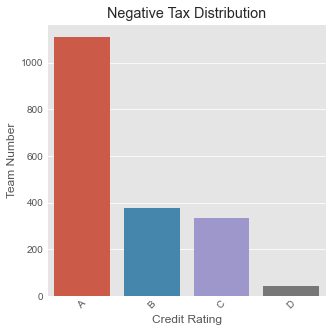

In [157]:
# visualization
data_dh = data_dh.groupby(['信誉评级','flag'])['金额'].agg('count').reset_index()
plt.figure(figsize=(5,5))
sns.barplot(x=data_dh['信誉评级'], y=data_dh[data_dh['flag']==-1]['金额'])
plt.xticks(rotation= 45)
plt.xlabel('Credit Rating')
plt.ylabel('Team Number')
plt.title('Negative Tax Distribution')

In [145]:
data_dh

,信誉评级,flag,金额
0,A,-1,1110
1,A,1,121965
2,B,-1,376
3,B,1,38269
4,C,-1,332
5,C,1,35915
6,D,-1,42
7,D,1,5330


Text(0, 0.5, 'Count')

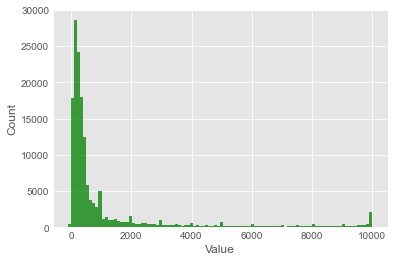

In [178]:
plt.hist(dt1_2[(dt1_2['价税合计']<10000)&(dt1_2['价税合计']>-100)]['价税合计'], bins=100, facecolor='g', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Count')

In [159]:
dt1_2['价税合计'].describe()

count    2.033390e+05
mean     5.172462e+04
std      6.477600e+05
min     -1.110000e+07
25%      2.179400e+02
50%      5.000000e+02
75%      8.600000e+03
max      1.169993e+07
Name: 价税合计, dtype: float64

In [267]:
data = pd.read_csv('data2.csv')

In [268]:
data

,企业编号,TOPSIS,机器学习
0,124,1,1
1,125,2,2
2,126,3,3
3,127,4,4
4,128,4,4
...,...,...,...
292,421,2,2
293,422,4,4
294,423,4,4
295,424,2,2


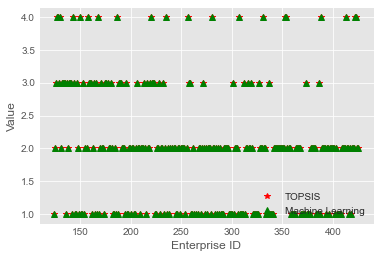

In [269]:
plot1=plt.plot(data['企业编号'], data['TOPSIS'], 'r*',label='TOPSIS')
plot2=plt.plot(data['企业编号'], data['机器学习'], 'g^',label='Machine Learning')
plt.xlabel('Enterprise ID')
plt.ylabel('Value')
plt.legend(loc=4)
# plt.title('C-level enterprise')
plt.show()